In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

In [3]:
data = pd.read_csv('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_representative_regions(ver240113).csv')

In [4]:
data['o3_o1d']    = data['o3_mole']/data['o1d_mole']
data['cos_lat']   = np.cos(data['latitude']/180*np.pi)
data['ln_o3_o1d'] = np.log(data['o3_o1d'])
data = data[data['region']!="SGP"]
data = data[data['region']!="VAN"]

In [5]:
o3_o1d_region_mean = data.groupby(['region']).mean()['o3_o1d']
o3_o1d_region_std = data.groupby(['region']).std()['o3_o1d']
o3_o1d_region_ct = data.groupby(['region']).count()['o3_o1d']
o3_o1d_region_ste = o3_o1d_region_std/np.sqrt(o3_o1d_region_ct/5)

cos_lat_region_mean = data.groupby(['region']).mean()['cos_lat']
cos_lat_region_std = data.groupby(['region']).std()['cos_lat']
cos_lat_region_ct = data.groupby(['region']).count()['cos_lat']
cos_lat_region_ste = cos_lat_region_std/np.sqrt(cos_lat_region_ct/5)

ln_o3_o1d_region_mean = data.groupby(['region']).mean()['ln_o3_o1d']
ln_o3_o1d_region_std = data.groupby(['region']).std()['ln_o3_o1d']
ln_o3_o1d_region_ct = data.groupby(['region']).count()['ln_o3_o1d']
ln_o3_o1d_region_ste = ln_o3_o1d_region_std/np.sqrt(ln_o3_o1d_region_ct/5)

In [6]:
o1d = pd.DataFrame()
o1d['o3_o1d_mean'] = o3_o1d_region_mean
o1d['o3_o1d_ste'] = o3_o1d_region_ste
o1d['ln_o3_o1d_mean'] = ln_o3_o1d_region_mean
o1d['ln_o3_o1d_ste'] = ln_o3_o1d_region_ste
o1d['cos_lat_mean'] = cos_lat_region_mean
o1d['cos_lat_ste'] = cos_lat_region_ste

In [9]:
mod = LinearRegression()
X = o1d[['cos_lat_mean']]
y = o1d['ln_o3_o1d_mean']*10**(-1)
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))
print(np.sqrt(MSE(y_pred, y)))

[-0.55725273]
3.739040240874091
0.9306101756541616
0.021197396806267383


In [42]:
mod = LinearRegression()
X = o1d[['cos_lat_mean']]
y = o1d['ln_o3_o1d_mean']*10**(-1)
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))
print(np.sqrt(MSE(y_pred, y)))

[-0.55725273]
3.739040240874091
0.9306101756541616
0.021197396806267383


In [70]:
mod = LinearRegression()
X = o1d[['cos_lat_mean']]
y = o1d['ln_o3_o1d_mean']*10**(-1)
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))
print(np.sqrt(MSE(y_pred, y)))

[-0.55725273]
3.739040240874091
0.9306101756541616
0.021197396806267383


In [71]:
data_sens = pd.read_csv('Fig. 3b SnSv sensitivities scatter plot.csv')

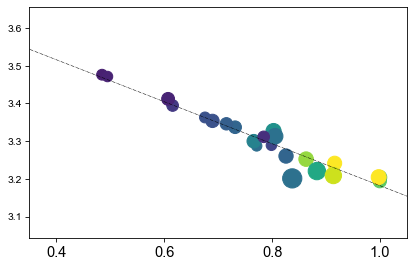

In [72]:
fig, ax = plt.subplots(figsize=(6.5, 4), dpi=75)
X = o1d[['cos_lat_mean']]
y = o1d['ln_o3_o1d_mean']*10**(-1)
size = data_sens['o3_ppb']
o3net = data_sens['o3net_mole']

x_set = np.arange(0.2,1.3,0.1)
y_set = x_set*mod.coef_+mod.intercept_
plt.plot(x_set, y_set, linestyle='-.', linewidth=0.5, color="black")

plt.scatter(X, y, s=size**1.5, vmin=0, vmax=1.5, c=o3net, cmap="viridis")

#plt.colorbar()
plt.xlim([0.35,1.05])
#plt.ylim([3.1,3.6])
#plt.yticks([8,9], fontsize=14)
plt.xticks([0.4,0.6,0.8,1.0], fontsize=14)

plt.savefig("Fig. 3e O3_O(1D)-latitude.pdf", format="pdf", bbox_inches="tight")